In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("june_exams.csv")
results = df[df["Name"] != "Total"].set_index("Name").drop(columns="Class")
total = df[df["Name"] == "Total"].set_index("Name").drop(columns="Class").iloc[0]
norm = results.div(total, axis="columns").round(2)

#melting df for further analysis
norm_table = df[df["Name"] != "Total"][['Name','Class']].reset_index(drop=True)
#print(norm.reset_index(col_level=1))
norm_table = pd.concat([norm_table, norm.reset_index(drop=True)],axis=1)
melt = norm_table.melt(id_vars=['Name','Class'],var_name='Subject_Exam', value_name='Mark')
melt[['Subject','Exam']] = melt['Subject_Exam'].str.split('_',expand=True)
melt = melt.drop(columns=['Subject_Exam'])[["Name", "Class", "Subject", "Exam","Mark"]]

# Visulisation of the Entire Dataset

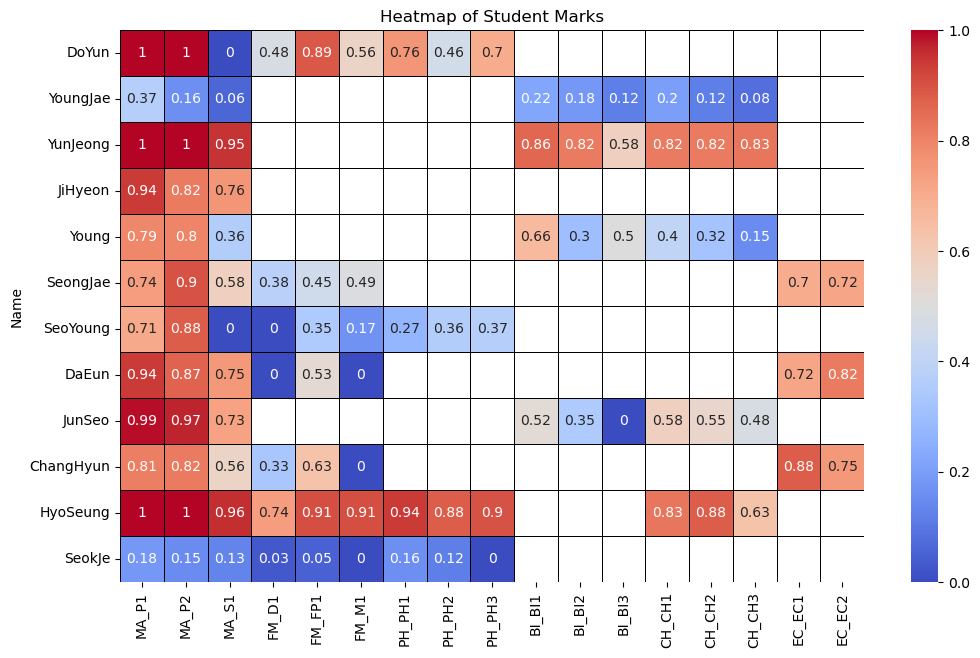

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=norm,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of Student Marks")
plt.show()

<Axes: xlabel='Exam', ylabel='Mark'>

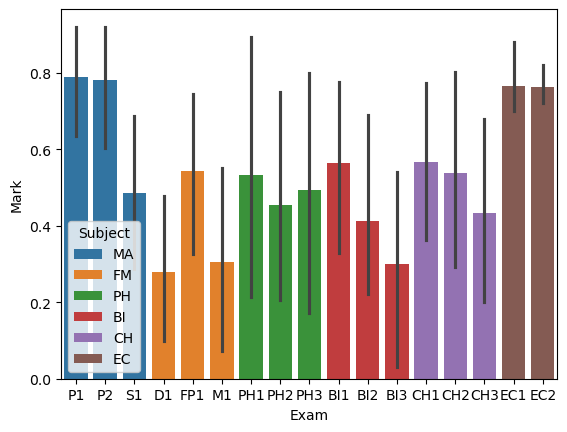

In [27]:
sns.barplot(melt, x ='Exam',y='Mark',hue='Subject')

Text(0.5, 1.0, 'Maths P1')

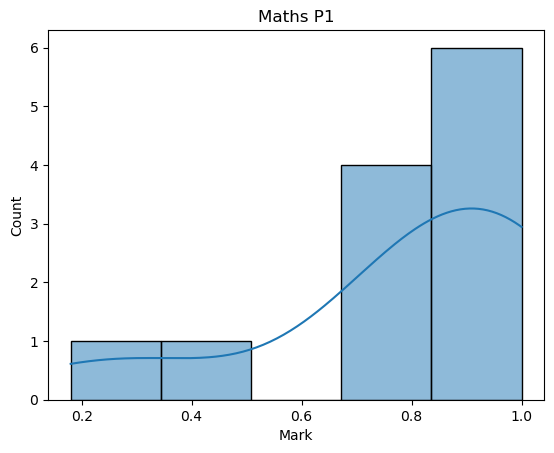

In [28]:
sns.histplot(data=melt[melt['Exam']=='P1'],x = 'Mark',kde=True)
plt.title('Maths P1')

# Filtering for Biology and Chemistry

In [29]:
Bio = norm[[col for col in norm.columns if 'BI' in col]]
Chem = norm[[col for col in norm.columns if 'CH' in col]]
BioChem = pd.concat([Bio, Chem],axis=1).dropna(how='all')

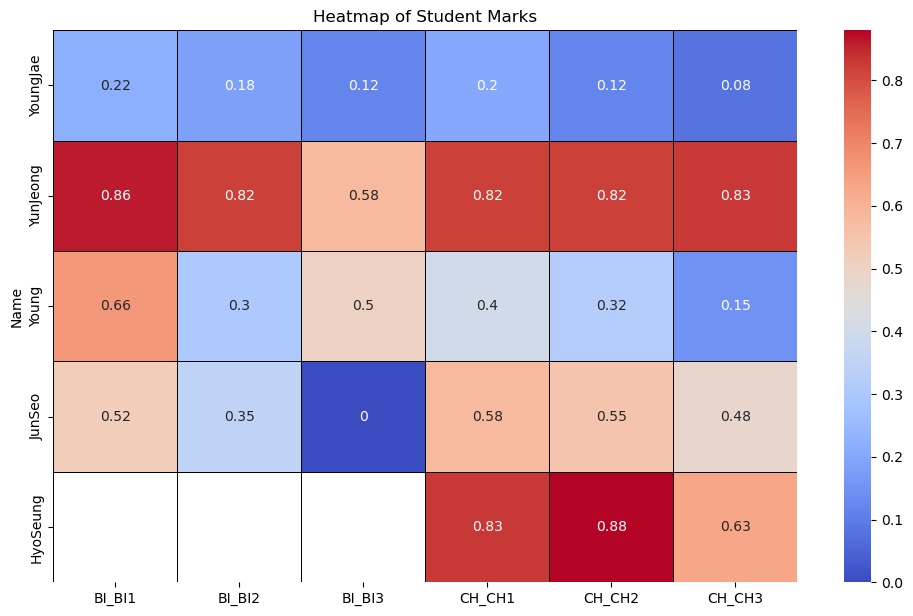

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=BioChem,
    annot=True,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="black",
)

# Adjust the top margin to give more space for labels
plt.subplots_adjust(top=0.8)
plt.title("Heatmap of Student Marks")
plt.show()

In [22]:
print(BioChem.mean())

BI_1    0.5650
BI_2    0.4125
BI_3    0.3000
CH_1    0.5660
CH_2    0.5380
CH_3    0.4340
dtype: float64
